In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.reshape(x_train,(x_train.shape[0],28,28,1)) 
x_test = np.reshape(x_test,(x_test.shape[0],28,28,1))

number_of_classes = 10

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

model = Sequential()
model.add(Conv2D(32, (5,5), padding='same', input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Flatten())
# model.add(Dense(384))
# model.add(Activation('relu'))
model.add(Dense(192))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes))
model.add(Activation('softmax'))

# RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 206s 3ms/step - loss: 0.6656 - acc: 0.7661 - val_loss: 0.4491 - val_acc: 0.8387
Epoch 2/10
60000/60000 [==============================] - 217s 4ms/step - loss: 0.4457 - acc: 0.8450 - val_loss: 0.3839 - val_acc: 0.8637
Epoch 3/10
60000/60000 [==============================] - 233s 4ms/step - loss: 0.3864 - acc: 0.8658 - val_loss: 0.3462 - val_acc: 0.8761
Epoch 4/10
60000/60000 [==============================] - 234s 4ms/step - loss: 0.3536 - acc: 0.8779 - val_loss: 0.3197 - val_acc: 0.8865
Epoch 5/10
60000/60000 [==============================] - 247s 4ms/step - loss: 0.3352 - acc: 0.8838 - val_loss: 0.3052 - val_acc: 0.8908
Epoch 6/10
60000/60000 [==============================] - 246s 4ms/step - loss: 0.3171 - acc: 0.8906 - val_loss: 0.2970 - val_acc: 0.8943
Epoch 7/10
60000/60000 [==============================] - 245s 4ms/step - loss: 0.3051 - acc: 0.8942 - val_loss: 0.2890 - 

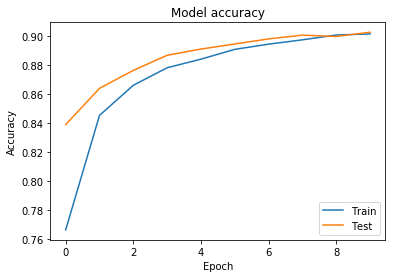

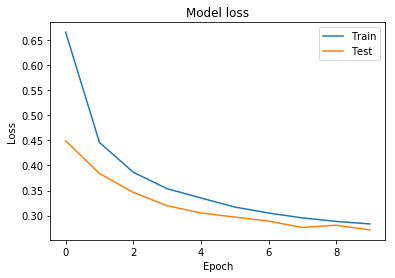

In [4]:
model.summary()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [7]:
# import time
# start_time = time.clock()
# print("--- %s seconds ---" % round(time.time() - start_time))

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

from sklearn.linear_model import LogisticRegression

input_dim = 28*28
x_train = x_train.reshape(x_train.shape[0], input_dim) 
x_test = x_test.reshape(x_test.shape[0], input_dim) 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255

LR = LogisticRegression()
LR.fit(x_train, y_train)
predictions_LR = LR.predict(x_test)
score_LR = LR.score(x_test, y_test)
print(score_LR)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


--- 1555305950 seconds ---


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8412


In [8]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
predictions_LDA = LDA.predict(x_test)
score_LDA = LDA.score(x_test, y_test)
print(score_LDA)

0.8151


In [9]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predictions_RF = RF.predict(x_test)
score_RF = RF.score(x_test, y_test)
print(score_RF)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8557


In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predictions_gnb = gnb.predict(x_test)
score_gnb = gnb.score(x_test, y_test)
print(score_gnb)

0.5856


In [11]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions_DT = DT.predict(x_test)
score_DT = DT.score(x_test, y_test)
print(score_DT)

0.792


In [12]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', gamma='auto')
SVM.fit(x_train, y_train)
predictions_SVM = SVM.predict(x_test)
score_SVM = SVM.score(x_test, y_test)
print(score_SVM)

0.8463


In [13]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)
predictions_KNN = KNN.predict(x_test)
score_KNN = KNN.score(x_test, y_test)
print(score_KNN)

0.8541


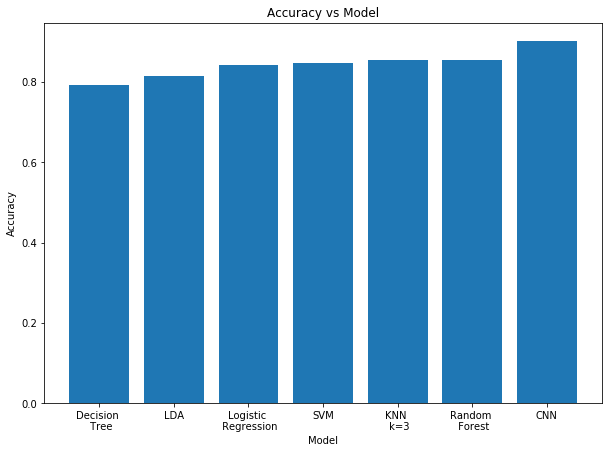

In [25]:
Model = ('Decision \n Tree', 'LDA', 'Logistic \n Regression', 'SVM', 'KNN \n k=3', 'Random \n Forest', 'CNN')
AMR = [score_DT, score_LDA, score_LR, score_SVM, score_KNN, score_RF, scores[1]]
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(Model)), AMR)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.xticks(np.arange(len(Model)), Model)
plt.show()

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
__________